In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn import metrics

C:\Users\KARTIK\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("http://bit.ly/w-data")

# Plot Average Scores

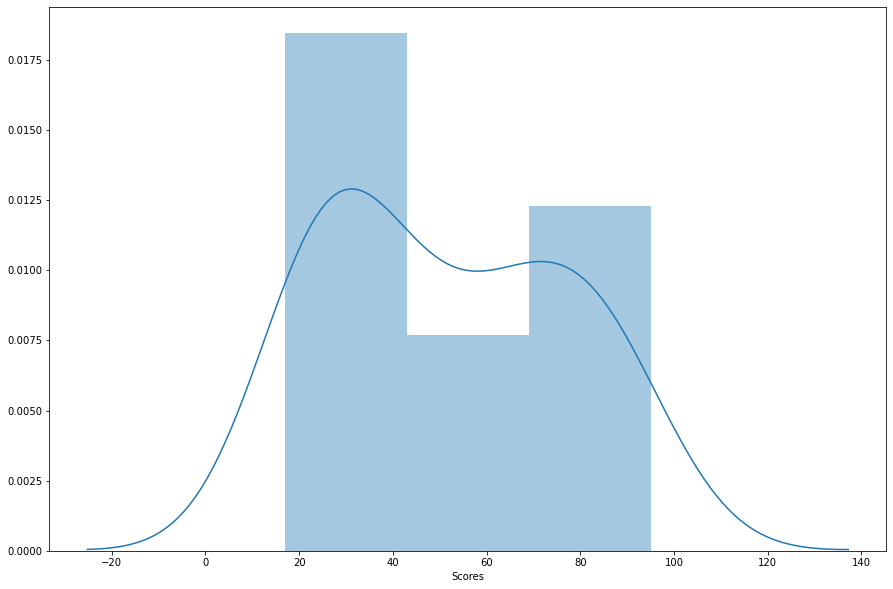

In [4]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data['Scores'])
plt.xlabel("Scores")
plt.show()

Average score between 20 to 40

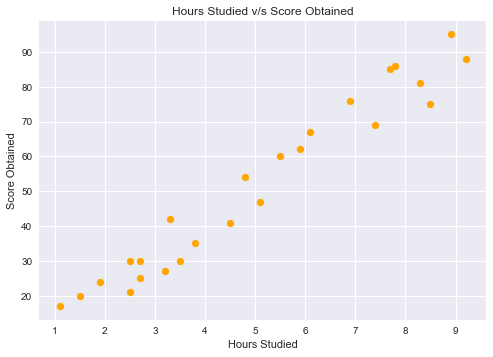

In [5]:
plt.style.use("seaborn")
plt.figure()
plt.title("Hours Studied v/s Score Obtained")
plt.scatter(data['Hours'],data["Scores"],c=['orange'])
plt.xlabel("Hours Studied")
plt.ylabel("Score Obtained")
plt.show()

We can see that data is linear

In [6]:
X=data.iloc[:,0]
y=data.iloc[:,1]

In [7]:
## converting our data into array
X=np.array(X)
y=np.array(y)

In [8]:
X=np.reshape(X,(-1,1))
y=np.reshape(y,(-1,1))

In [9]:
## Applying train test split to split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.33, random_state=42)

## Taken three different  linear regression models 

In [11]:
ridge=Ridge()
lr=LinearRegression()
lasso=Lasso()

In [12]:
ridge.fit(X_train,y_train)
lr.fit(X_train,y_train)
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
y_pred=ridge.predict(X_test)
y_pred_lr=lr.predict(X_test)
y_pred_lasso=lasso.predict(X_test)

In [14]:
y_pred_lr

array([[83.50244409],
       [27.53075726],
       [27.53075726],
       [69.99203692],
       [60.34174609],
       [29.46081542],
       [35.25098992],
       [52.62151342],
       [40.07613534]])

In [15]:
ridge.score(X_test,y_test)

0.9425571411471005

In [16]:
lasso.score(X_test,y_test)

0.9418078598558759

In [17]:
lr.score(X_test,y_test)

0.9435488190277577

We can see that scores are almost equal for all models

In [18]:
print("Mean squared error using Linear Regression",metrics.mean_squared_error(y_pred_lr,y_test))
print("Mean Absolute error using Linear Regression",metrics.mean_absolute_error(y_pred_lr,y_test))
print("\n\n")
print("Mean squared error using Ridge Regression",metrics.mean_squared_error(y_pred,y_test))
print("Mean Absolute error using Ridge Regression",metrics.mean_absolute_error(y_pred,y_test))
print("\n\n")
print("Mean squared error using Lasso Regression",metrics.mean_squared_error(y_pred_lasso,y_test))
print("Mean Absolute error using Lasso Regression",metrics.mean_absolute_error(y_pred_lasso,y_test))

Mean squared error using Linear Regression 24.074686364260987
Mean Absolute error using Linear Regression 4.564015037730867



Mean squared error using Ridge Regression 24.49760637301926
Mean Absolute error using Ridge Regression 4.577658060887168



Mean squared error using Lasso Regression 24.81715171776076
Mean Absolute error using Lasso Regression 4.586832579322816


In [19]:
print("Accoring to our model if a student study for only 10 hour he can score",lr.predict([[9.5]]))

Accoring to our model if a student study for only 10 hour he can score [[95.08279309]]


In [20]:
df = pd.DataFrame({'Actual':y_test.flatten() , 'Predicted':y_pred_lr.flatten()})

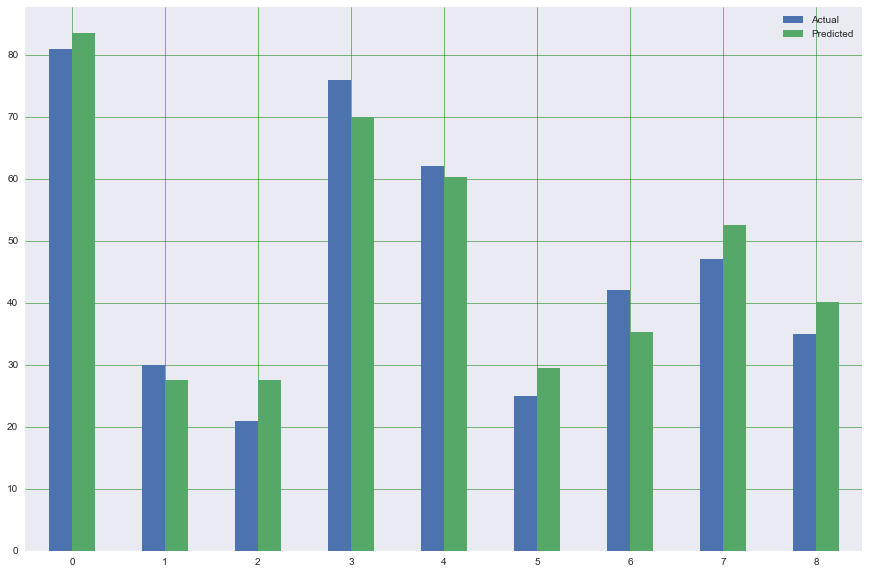

In [21]:
df.plot(kind="bar",figsize=(15,10))
plt.grid(linestyle="-",linewidth="0.5",color='green')
plt.grid(which="minor",linestyle=":",linewidth="0.5",color='black')
plt.xticks(rotation=0)
plt.show()

Bar graph shows the comparison between Actual and predicted values

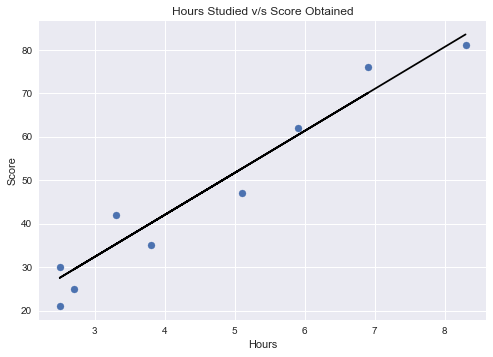

In [22]:
yp=lr.predict(X_test)
plt.figure()
plt.scatter(X_test,y_test)
plt.plot(X_test,yp,color='Black')
plt.title("Hours Studied v/s Score Obtained")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

In [23]:
line=lr.coef_*X + lr.intercept_

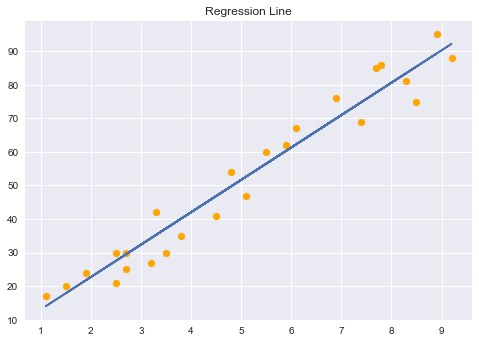

In [24]:
plt.title("Regression Line")
plt.scatter(X,y,color="orange")
plt.plot(X,line)
plt.show()

In [25]:
## Score checking through R2 score. 
#  "R squared", is the proportion of the variance in the dependent variable that is predictable 
#   from the independent variable

In [26]:
r2_score(y_test,yp)

0.9435488190277577